In [11]:
import sys
sys.path.append('..')

from src.data.dataset import MVTecDataset, get_default_transforms
import matplotlib.pyplot as plt
import numpy as np
import torch

In [7]:
img_transforms, mask_transforms = get_default_transforms(256)

train = MVTecDataset(
    root_dir="../data/raw/mvtec_anomaly_detection",
    category="bottle",
    split="train",
    transform=img_transforms
)

test = MVTecDataset(
    root_dir="../data/raw/mvtec_anomaly_detection",
    category="bottle",
    split="test",
    transform=img_transforms,
    mask_transform=mask_transforms
)

In [10]:
print(train.get_stats())
test.get_stats()

{'total_images': 209, 'normal': 209, 'anomaly': 0, 'defect_types': {'good': 209}}


{'total_images': 83,
 'normal': 20,
 'anomaly': 63,
 'defect_types': {'broken_large': 20,
  'broken_small': 22,
  'contamination': 21,
  'good': 20}}

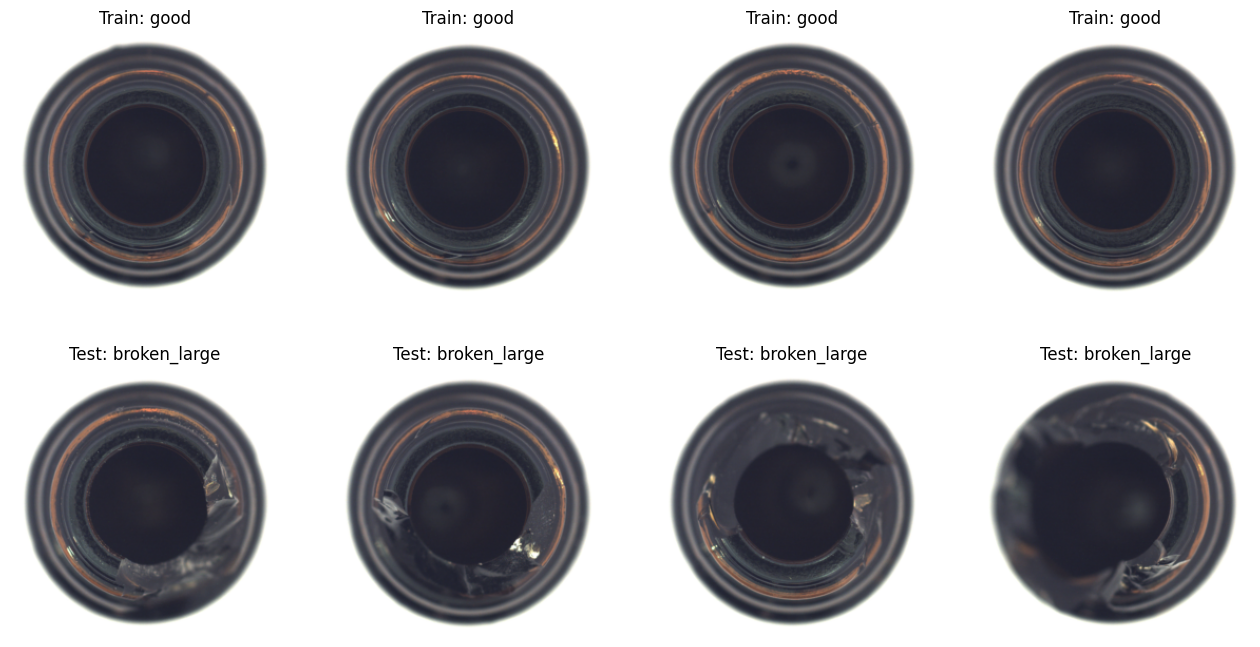

In [15]:
def denormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return (tensor * std + mean).clamp(0, 1)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(4):
    sample = train[i * 10]
    img = denormalize(sample['image']).permute(1, 2, 0).numpy()
    axes[0, i].imshow(img)
    axes[0, i].set_title(f"Train: {sample['defect_type']}")
    axes[0, i].axis('off')

anomaly_indices = [i for i, label in enumerate(test.labels) if label == 1]
for i in range(4):
    idx = anomaly_indices[i]
    sample = test[idx]
    img = denormalize(sample['image']).permute(1, 2, 0).numpy()
    axes[1, i].imshow(img)
    axes[1, i].set_title(f"Test: {sample['defect_type']}")
    axes[1, i].axis('off')

plt.savefig('../experiments/data_samples.png', dpi=150, bbox_inches='tight')
plt.show()